## Regression Model Notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("housing_price_dataset.csv")
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [3]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.head()

,squarefeet,bedrooms,bathrooms,neighborhood,yearbuilt,price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   squarefeet    50000 non-null  int64  
 1   bedrooms      50000 non-null  int64  
 2   bathrooms     50000 non-null  int64  
 3   neighborhood  50000 non-null  object 
 4   yearbuilt     50000 non-null  int64  
 5   price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


In [5]:
df.isna().sum()

squarefeet      0
bedrooms        0
bathrooms       0
neighborhood    0
yearbuilt       0
price           0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

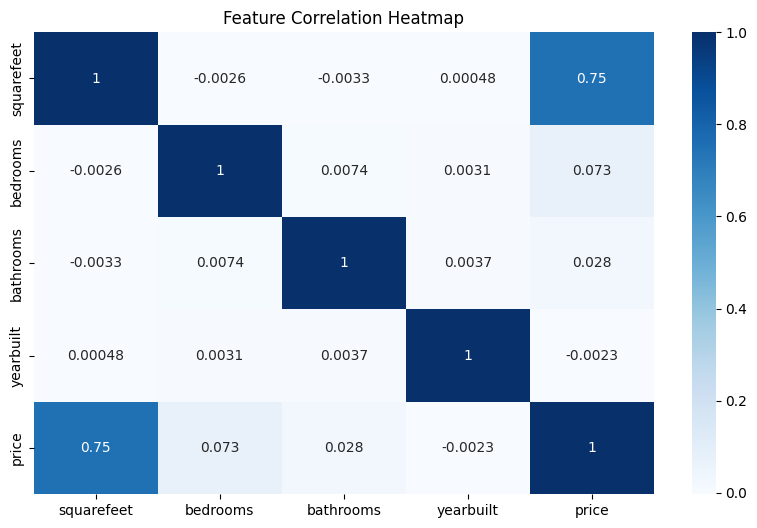

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()

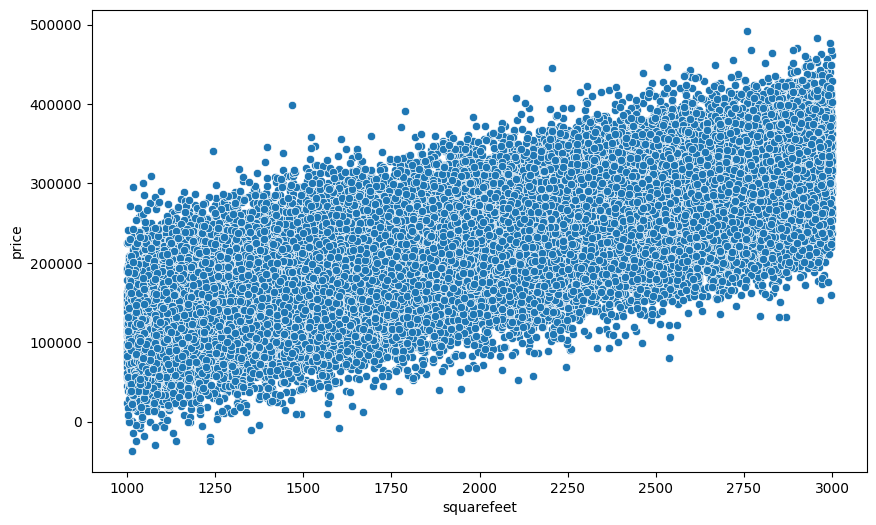

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(df, x='squarefeet', y='price')
plt.show()

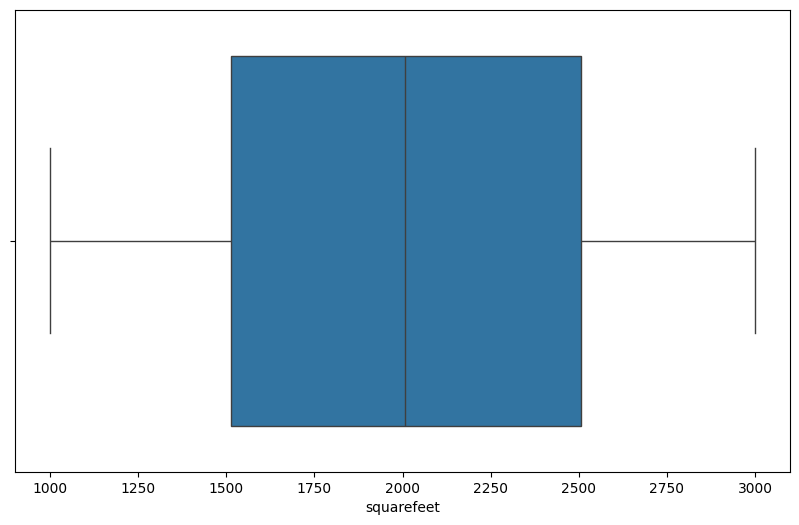

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['squarefeet'])
plt.show()

In [10]:
df.head()

,squarefeet,bedrooms,bathrooms,neighborhood,yearbuilt,price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [11]:
df['bedrooms'].value_counts()

bedrooms
3    12661
5    12468
2    12436
4    12435
Name: count, dtype: int64

In [12]:
df['bathrooms'].value_counts()

bathrooms
1    16755
2    16719
3    16526
Name: count, dtype: int64

In [13]:
df['neighborhood'].value_counts()

neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [14]:
df['yearbuilt'].nunique()

72

In [15]:
df['yearbuilt'].describe()

count    50000.000000
mean      1985.404420
std         20.719377
min       1950.000000
25%       1967.000000
50%       1985.000000
75%       2003.000000
max       2021.000000
Name: yearbuilt, dtype: float64

In [16]:
def AgeType(year):
    if year <= 1950:
        return 'Old'
    elif year <= 2015:
        return "Medium"
    else:
        return "New"
    
df['agetype'] = df['yearbuilt'].apply(AgeType)
df.head()

,squarefeet,bedrooms,bathrooms,neighborhood,yearbuilt,price,agetype
0,2126,4,1,Rural,1969,215355.283618,Medium
1,2459,3,2,Rural,1980,195014.221626,Medium
2,1860,2,1,Suburb,1970,306891.012076,Medium
3,2294,2,1,Urban,1996,206786.787153,Medium
4,2130,5,2,Suburb,2001,272436.239065,Medium


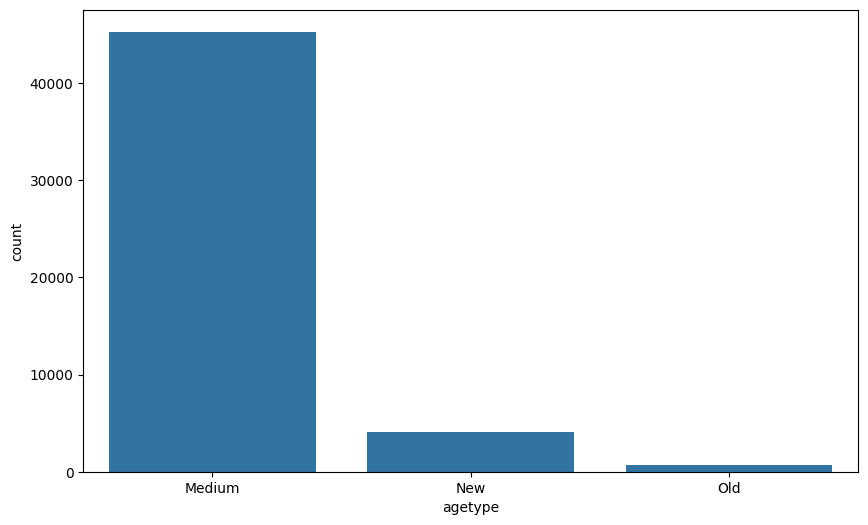

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x=df['agetype'])
plt.show()

In [18]:
data = df
data.drop(columns=['yearbuilt'], inplace=True)
data.head()

,squarefeet,bedrooms,bathrooms,neighborhood,price,agetype
0,2126,4,1,Rural,215355.283618,Medium
1,2459,3,2,Rural,195014.221626,Medium
2,1860,2,1,Suburb,306891.012076,Medium
3,2294,2,1,Urban,206786.787153,Medium
4,2130,5,2,Suburb,272436.239065,Medium


In [19]:
X = data.drop(columns='price', axis=1)
y = data['price']

In [20]:
X.head()

,squarefeet,bedrooms,bathrooms,neighborhood,agetype
0,2126,4,1,Rural,Medium
1,2459,3,2,Rural,Medium
2,1860,2,1,Suburb,Medium
3,2294,2,1,Urban,Medium
4,2130,5,2,Suburb,Medium


In [21]:
y.head()

0    215355.283618
1    195014.221626
2    306891.012076
3    206786.787153
4    272436.239065
Name: price, dtype: float64

In [22]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
# from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

In [23]:
ohe = OneHotEncoder(sparse_output=False, drop="first").set_output(transform='pandas')
ordinal = OrdinalEncoder(categories=[['Old', 'Medium', 'New']])

In [24]:
X.head()

,squarefeet,bedrooms,bathrooms,neighborhood,agetype
0,2126,4,1,Rural,Medium
1,2459,3,2,Rural,Medium
2,1860,2,1,Suburb,Medium
3,2294,2,1,Urban,Medium
4,2130,5,2,Suburb,Medium


In [25]:
ohe_cols = X[['neighborhood']]
ordinal_cols = X[['agetype']]

ohe_transformed = ohe.fit_transform(ohe_cols)
ordinal_cols_transformed = ordinal.fit_transform(ordinal_cols)

In [26]:
ohe_transformed.head()

,neighborhood_Suburb,neighborhood_Urban
0,0.0,0.0
1,0.0,0.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [27]:
ordinal_cols_transformed

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [28]:
X['agetype'] = ordinal_cols_transformed
X.head()

,squarefeet,bedrooms,bathrooms,neighborhood,agetype
0,2126,4,1,Rural,1.0
1,2459,3,2,Rural,1.0
2,1860,2,1,Suburb,1.0
3,2294,2,1,Urban,1.0
4,2130,5,2,Suburb,1.0


In [29]:
X['agetype'].value_counts()

agetype
1.0    45305
2.0     4052
0.0      643
Name: count, dtype: int64

In [30]:
X = pd.concat((X, ohe_transformed), axis=1)
X.head()

,squarefeet,bedrooms,bathrooms,neighborhood,agetype,neighborhood_Suburb,neighborhood_Urban
0,2126,4,1,Rural,1.0,0.0,0.0
1,2459,3,2,Rural,1.0,0.0,0.0
2,1860,2,1,Suburb,1.0,1.0,0.0
3,2294,2,1,Urban,1.0,0.0,1.0
4,2130,5,2,Suburb,1.0,1.0,0.0


In [31]:
X.drop(columns='neighborhood', inplace=True)
X.head()

,squarefeet,bedrooms,bathrooms,agetype,neighborhood_Suburb,neighborhood_Urban
0,2126,4,1,1.0,0.0,0.0
1,2459,3,2,1.0,0.0,0.0
2,1860,2,1,1.0,1.0,0.0
3,2294,2,1,1.0,0.0,1.0
4,2130,5,2,1.0,1.0,0.0


In [32]:
Xnums = X.select_dtypes(include='int64')
Xnums.head()

,squarefeet,bedrooms,bathrooms
0,2126,4,1
1,2459,3,2
2,1860,2,1
3,2294,2,1
4,2130,5,2


In [33]:
for col in Xnums.columns:
    X[col] = X[col].astype(float)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   squarefeet           50000 non-null  float64
 1   bedrooms             50000 non-null  float64
 2   bathrooms            50000 non-null  float64
 3   agetype              50000 non-null  float64
 4   neighborhood_Suburb  50000 non-null  float64
 5   neighborhood_Urban   50000 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


In [34]:
X.head()

,squarefeet,bedrooms,bathrooms,agetype,neighborhood_Suburb,neighborhood_Urban
0,2126.0,4.0,1.0,1.0,0.0,0.0
1,2459.0,3.0,2.0,1.0,0.0,0.0
2,1860.0,2.0,1.0,1.0,1.0,0.0
3,2294.0,2.0,1.0,1.0,0.0,1.0
4,2130.0,5.0,2.0,1.0,1.0,0.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
X_train.iloc[:,0:3] = scaler.fit_transform(X_train.iloc[:,0:3])
X_test.iloc[:,0:3] = scaler.fit_transform(X_test.iloc[:,0:3])

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [40]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"r-squared score is: {round(r2,2)}")
print(f"root MSE is: ${round(rmse,2)}")

r-squared score is: 0.58
root MSE is: $49359.86


In [41]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_const)
result = ols_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     8796.
Date:                Fri, 25 Jul 2025   Prob (F-statistic):               0.00
Time:                        12:52:26   Log-Likelihood:            -4.8959e+05
No. Observations:               40000   AIC:                         9.792e+05
Df Residuals:                   39993   BIC:                         9.793e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.137e+05   1

In [42]:
X.head()

,squarefeet,bedrooms,bathrooms,agetype,neighborhood_Suburb,neighborhood_Urban
0,2126.0,4.0,1.0,1.0,0.0,0.0
1,2459.0,3.0,2.0,1.0,0.0,0.0
2,1860.0,2.0,1.0,1.0,1.0,0.0
3,2294.0,2.0,1.0,1.0,0.0,1.0
4,2130.0,5.0,2.0,1.0,1.0,0.0


In [43]:
X.drop(columns=['agetype','neighborhood_Suburb'], inplace=True)
X.head()

,squarefeet,bedrooms,bathrooms,neighborhood_Urban
0,2126.0,4.0,1.0,0.0
1,2459.0,3.0,2.0,0.0
2,1860.0,2.0,1.0,0.0
3,2294.0,2.0,1.0,1.0
4,2130.0,5.0,2.0,0.0


In [44]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
X_train_2.iloc[:,:3] = scaler.fit_transform(X_train_2.iloc[:,:3])
X_test_2.iloc[:,:3] = scaler.transform(X_test_2.iloc[:,:3])

In [49]:
model.fit(X_train_2, y_train_2)

LinearRegression()

In [50]:
y_pred_2 = model.predict(X_test_2)

In [51]:
r2_2 = r2_score(y_test_2, y_pred_2)
rmse_2 = mean_squared_error(y_test_2, y_pred_2) ** 0.5

print(f"r-squared score is: {round(r2_2,2)}")
print(f"root MSE is: ${round(rmse_2,2)}")

r-squared score is: 0.58
root MSE is: $49361.23


In [52]:
X_train_2_const = sm.add_constant(X_train_2)
ols_model = sm.OLS(y_train_2, X_train_2_const)
result = ols_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                 1.319e+04
Date:                Sat, 26 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:43:14   Log-Likelihood:            -4.8959e+05
No. Observations:               40000   AIC:                         9.792e+05
Df Residuals:                   39995   BIC:                         9.792e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.135e+05    701